<a href="https://colab.research.google.com/github/gpriya32/NLP/blob/master/SPAM_MAILS_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets begin()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df=pd.read_csv('/content/drive/My Drive/DATASETS/emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [27]:
df[df['spam']==0]

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [28]:
df.iloc[1200][0]

"Subject: unbelievable new homes for the usa !  it ' s a beautiful day today  homeowner  you have been pre - approved for a $ 431 , 221 home loan at a 3 . 29 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  have a good day ,  shemika kelly"

In [29]:
df.iloc[1386][0]

'Subject: it purchasing process  as you all may be aware the it organization is undergoing significant  organizational changes at a very rapid pace . one of the groups that is being  heavily affected is purchasing , due to the large increase in the volume of  requests and some staff turnover . we realize that this is causing our users  some pain and we are re - engineering the process as quickly as possible . we  will be communicating the changes to the process over the next few weeks . we  apologize for the inconvenience and appreciate your patience in this regard .  if you have any questions while the process is being adjusted please contact  bob hillier at extension 3 - 0305 .  philippe bibi  cto , enron global technology'

In [30]:

# library to clean data 
import re  
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Stemming
from nltk.stem.porter import PorterStemmer 
corpus = []  
  

In [32]:
for i in range(0, 2000):  
      
    review = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['text'][i])
    review  = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     review)
    review  = re.sub(r'£|\$', 'moneysymb', review)
    review = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', review)
    review  = re.sub(r'\d+(\.\d+)?', 'numbr', review)

    # collapse whitespace (spaces, line breaks, tabs) into a single space.
    # eliminate any leading or trailing whitespace.
    review  = re.sub(r'[^\w\d\s]', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    review = re.sub(r'^\s+|\s+?$', '', review)

    review = review.lower()  
    review = review.split()  
    ps = PorterStemmer()   
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
    review = ' '.join(review)   
    corpus.append(review)  

In [33]:
for i in range(2000, 5728):  
      
    review = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['text'][i])
    review  = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     review)
    review  = re.sub(r'£|\$', 'moneysymb', review)
    review = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', review)
    review  = re.sub(r'\d+(\.\d+)?', 'numbr', review)
    review  = re.sub(r'[^\w\d\s]', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    review = re.sub(r'^\s+|\s+?$', '', review)

    review = review.lower()  
    review = review.split()  
    ps = PorterStemmer()   
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
    review = ' '.join(review)   
    corpus.append(review)  

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
# to create bag of words model
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_ngrams = vectorizer.fit_transform(corpus)
X_ngrams.shape

(5728, 319557)

In [35]:
y=df.iloc[:,1].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split( X_ngrams,y,test_size=0.3)

clf = svm.LinearSVC(loss='hinge',random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_test, y_pred)

0.9772998805256871

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1291,    3],
       [  16,  409]])

In [44]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
auc_recall_pre=auc(recall,precision)
auc_recall_pre


0.9821895624174202

In [47]:
precision


array([0.24723677, 0.99271845, 1.        ])

In [46]:
recall


array([1.        , 0.96235294, 0.        ])

In [54]:
from sklearn.metrics import roc_curve
false_positive,true_positive,_=roc_curve(y_test,y_pred)

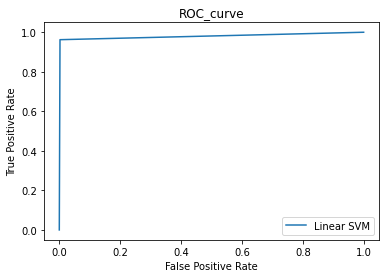

In [62]:
plt.plot(false_positive,true_positive,label='Linear SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend()
plt.show()